In [1]:
#bitcoin sell notification
import json
import time
import requests
from boltiot import Sms

SID = 'AC0860cf803a09838c54a90316e4xxxx'
AUTH_TOKEN = '6a03f2fcf7d1718b419233xxxxx'
TO_NUMBER = '+91858xxxxxx'
FROM_NUMBER = '+1762465xxxx'

sms = Sms(SID, AUTH_TOKEN, TO_NUMBER, FROM_NUMBER)

currency = input("Hello, Bitcoin investor! What currency would you like to invest in?\n")
sell = float(input("What is your selling point?\n"))

def get_bitcoin_price():
    URL = "https://min-api.cryptocompare.com/data/price?fsym=BTC&tsyms=" + currency
    response = requests.request("GET", URL)
    response = json.loads(response.text)
    current_price = int(response[currency.upper()])
    return current_price
while True:
    try:
        price = get_bitcoin_price()
        if price > sell:
            print("You can sell! Current Bitcoin price in " + currency + ":")
            print(price)
            response1 = sms.send_sms("The Bitcoins are at a price of " + str(price) + " " + currency)
            print("Status of SMS at Twilio: " + str(response1.status))
        time.sleep(10)
    except KeyboardInterrupt:
        print("stopped by the user")
        break
        

        

Hello, Bitcoin investor! What currency would you like to invest in?
USD
What is your selling point?
5000
You can sell! Current Bitcoin price in USD:
28625
Status of SMS at Twilio: queued
You can sell! Current Bitcoin price in USD:
28625
Status of SMS at Twilio: queued
stopped by the user


In [1]:
SID = 'AC0860cf803a09838c54a90316e4xxxx'
AUTH_TOKEN = '6a03f2fcf7d1718b419233f36cxxxxx'
TO_NUMBER = '+91858705xxx'
FROM_NUMBER = '+17624659xxxx'
FRAME_SIZE=15
MUL_FACTOR=3

the price of bitcoin is:USD 26298
computing z-score


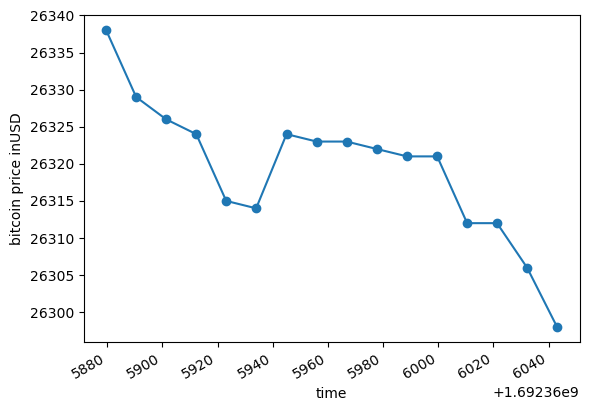

In [ ]:
#Anamoly detection
import time,json,requests,math,statistics
from boltiot import Sms
import matplotlib.pyplot as plt
from IPython.display import clear_output



def z_score(history_data,frame_size,factor,time_stamps):
    if len(history_data)<frame_size:
        return None
    if len(history_data)>frame_size:
        del history_data[0:len(history_data)-frame_size]
        del time_stamps[0:len(time_stamps)-frame_size]
        
    mn=statistics.mean(history_data)
    variance=0
    for data in history_data:
        variance+=math.pow((data-mn),2)
        
    zn=factor*math.sqrt(variance/frame_size)
    high_bound=history_data[frame_size-1]+zn
    low_bound=history_data[frame_size-1]-zn
    return[high_bound,low_bound]




sms = Sms(SID, AUTH_TOKEN, TO_NUMBER, FROM_NUMBER)
history_data=[]
time_stamps=[]



currency = input("Hello, Bitcoin investor! What currency would you like to invest in?\n")



plt.figure(figsize=(10,5))
plt.title="Bitcoin data visualization"
plt.ylabel("bitcoin price in"+currency)
plt.xlabel("time")



def get_bitcoin_price():
    URL = "https://min-api.cryptocompare.com/data/price?fsym=BTC&tsyms=" + currency
    response = requests.request("GET", URL)
    response = json.loads(response.text)
    current_price = int(response[currency.upper()])
    return current_price




try:
    while True:
        price = get_bitcoin_price()
        print("the price of bitcoin is:"+currency,price)
        print("computing z-score")
        bound=z_score(history_data,FRAME_SIZE,MUL_FACTOR,time_stamps)
        
        
        history_data.append(price)
        time_stamps.append(time.time())
        plt.clf()
        plt.plot(time_stamps,history_data,marker='o')
        plt.gcf().autofmt_xdate()
        plt.title="Bitcoin data visualization"
        plt.ylabel("bitcoin price in"+currency)
        plt.xlabel("time")
        plt.show()
        
        
        if bound and (bound[1] > price or bound[0] < price):
            plt.annotate('Anomaly', xy=(time_stamps[-1], price),
                         xytext=(15, 15), textcoords='offset points',
                         arrowprops=dict(facecolor='red', arrowstyle='wedge,tail_width=0.7'),
                         fontsize=10, color='red')

        
        if not bound:
            
            required_data=FRAME_SIZE-len(history_data)
            print("need more data:",required_data)
            time.sleep(5)
            clear_output(wait=True)
            continue
            
        if bound[1]>price:
            print("price drooped" + currency + ":")
            print(price)
            response1 = sms.send_sms("The Bitcoins price has dropped u can buy " + str(price) + " " + currency)
            print("Status of SMS at Twilio: " + str(response1.status))
            
        elif bound[0]<price:
            print("prices high" + currency + ":")
            print(price)
            response1 = sms.send_sms("The Bitcoins price has increased u can sell " + str(price) + " " + currency)
            print("Status of SMS at Twilio: " + str(response1.status))
            
        
        
        time.sleep(10)
        clear_output(wait=True)
        
except KeyboardInterrupt:
    print("stopped by the user")
     
plt.close()
    
    
    

TypeError: 'str' object is not callable

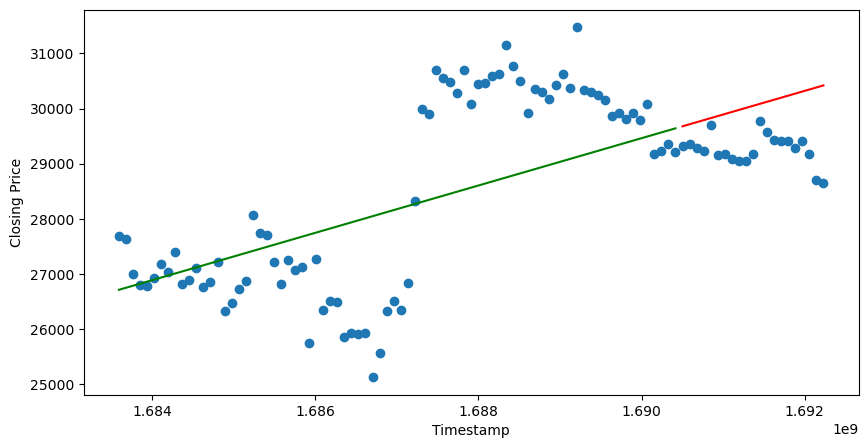

In [9]:
#linear regression
import json
import time
from scipy import stats
import requests
import matplotlib.pyplot as plt
from IPython.display import clear_output

url = 'https://min-api.cryptocompare.com/data/v2/histoday?fsym=BTC&tsym=USD&limit=100'

def get_historic_data():
    response = requests.get(url)
    data = json.loads(response.text)
    data_points = data['Data']['Data']
    
    prices = [entry['close'] for entry in data_points]
    timestamps = [entry['time'] for entry in data_points]
    
    return prices, timestamps




prices, timestamps = get_historic_data()

prices, timestamps = get_historic_data()
train_x=timestamps[:80]
train_y=prices[:80]
test_x=timestamps[80:]
test_y=prices[80:]

slope,intercept,r,p,std_err=stats.linregress(timestamps,prices)
def linear_regression(x):
    return slope*x + intercept

prediction_model=list(map(linear_regression,train_x))



plt.figure(figsize=(10, 5))
plt.scatter(timestamps, prices,label='history')
plt.plot(train_x,prediction_model,color='green',label='train')
prediction_model=list(map(linear_regression,test_x))
plt.plot(test_x,prediction_model,color='red',label='test')


plt.xlabel('Timestamp')
plt.ylabel('Closing Price')
plt.title('Bitcoin Price Time Series')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()
print(r)


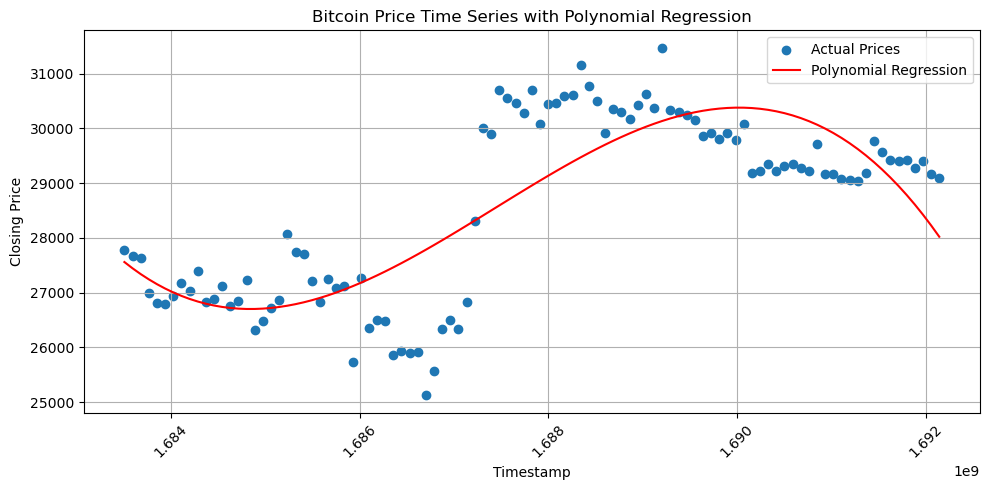

In [1]:
#polynomial regrression
import json
import time
import numpy as np
import requests
import matplotlib.pyplot as plt
from IPython.display import clear_output

url = 'https://min-api.cryptocompare.com/data/v2/histoday?fsym=BTC&tsym=USD&limit=100'

def get_historic_data():
    response = requests.get(url)
    data = json.loads(response.text)
    data_points = data['Data']['Data']
    
    prices = [entry['close'] for entry in data_points]
    timestamps = [entry['time'] for entry in data_points]
    
    return prices, timestamps

prices, timestamps = get_historic_data()

# Perform Polynomial Regression
degree = 3  # Change the degree of the polynomial
coefficients = np.polyfit(timestamps, prices, degree)
polynomial = np.poly1d(coefficients)

# Generate predictions using the polynomial
predictions = polynomial(timestamps)

plt.figure(figsize=(10, 5))
plt.scatter(timestamps, prices, label='Actual Prices')
plt.plot(timestamps, predictions, color='red', label='Polynomial Regression')
plt.xlabel('Timestamp')
plt.ylabel('Closing Price')
plt.title('Bitcoin Price Time Series with Polynomial Regression')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


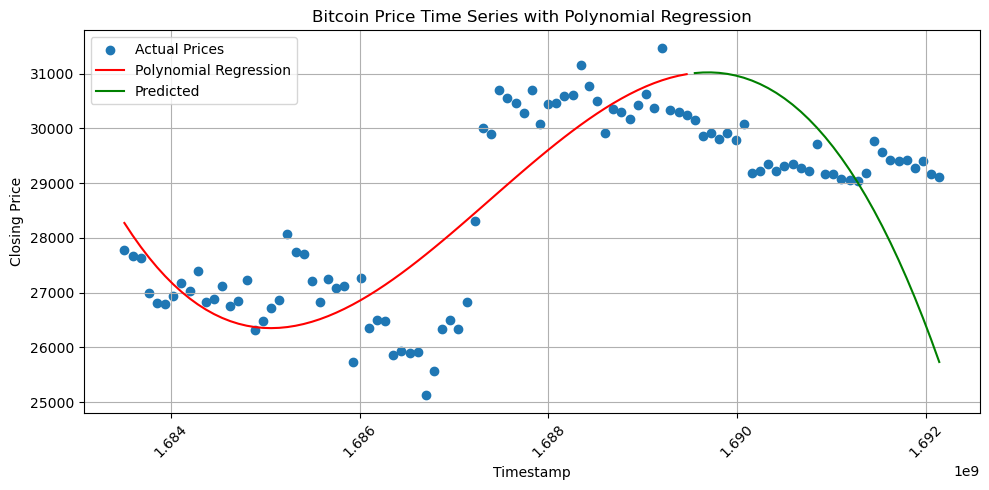

0.5005911359218711


In [7]:
#train and test
import json
import time
import numpy as np
import requests
import matplotlib.pyplot as plt
from IPython.display import clear_output
from sklearn.metrics import r2_score

url = 'https://min-api.cryptocompare.com/data/v2/histoday?fsym=BTC&tsym=USD&limit=100'

def get_historic_data():
    response = requests.get(url)
    data = json.loads(response.text)
    data_points = data['Data']['Data']
    
    prices = [entry['close'] for entry in data_points]
    timestamps = [entry['time'] for entry in data_points]
    
    return prices, timestamps

prices, timestamps = get_historic_data()
train_x=timestamps[:70]
train_y=prices[:70]
test_x=timestamps[70:]
test_y=prices[70:]

# Perform Polynomial Regression
degree = 3  # Change the degree of the polynomial
coefficients = np.polyfit(train_x, train_y, degree)
polynomial = np.poly1d(coefficients)

# Generate predictions using the polynomial
predictions = polynomial(train_x)

plt.figure(figsize=(10, 5))
plt.scatter(timestamps, prices, label='Actual Prices')
plt.plot(train_x, predictions, color='red', label='Polynomial Regression')
predictions = polynomial(test_x)
plt.plot(test_x, predictions, color='green', label='Predicted')
plt.xlabel('Timestamp')
plt.ylabel('Closing Price')
plt.title('Bitcoin Price Time Series with Polynomial Regression')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
print(r2_score(prices,polynomial(timestamps)))

